# Requirements

In [1344]:
import pandas as pd
import missingno as msno
import numpy as np

In [1345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost as xgb
import datetime as dt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [1346]:
df=pd.read_csv('obesity (1).csv')
df.head(10)

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.000000,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II
5,5,NaN,Male,18.128249,1.748524,51.552595,2.919751,3.000000,no,2.137550,1.930033,NaN,Public_Transportation,NaN
6,6,NaN,Male,29.883021,1.754711,NaN,1.991240,3.000000,no,2.000000,0.000000,0.696948,Automobile,NaN
7,7,7.0,Male,NaN,1.750150,118.206565,1.397468,3.000000,NaN,NaN,0.598655,0.000000,Automobile,Obesity_Type_II
8,8,8.0,Male,17.000000,NaN,NaN,NaN,3.000000,no,3.000000,1.000000,1.000000,Public_Transportation,Overweight_Level_I
9,9,9.0,Female,26.000000,1.638836,111.275646,3.000000,3.000000,NaN,NaN,0.000000,0.218645,Public_Transportation,NaN


Explore the dataset using visualizations of your choice.

In [1347]:
#sns.pairplot(df)

<Axes: >

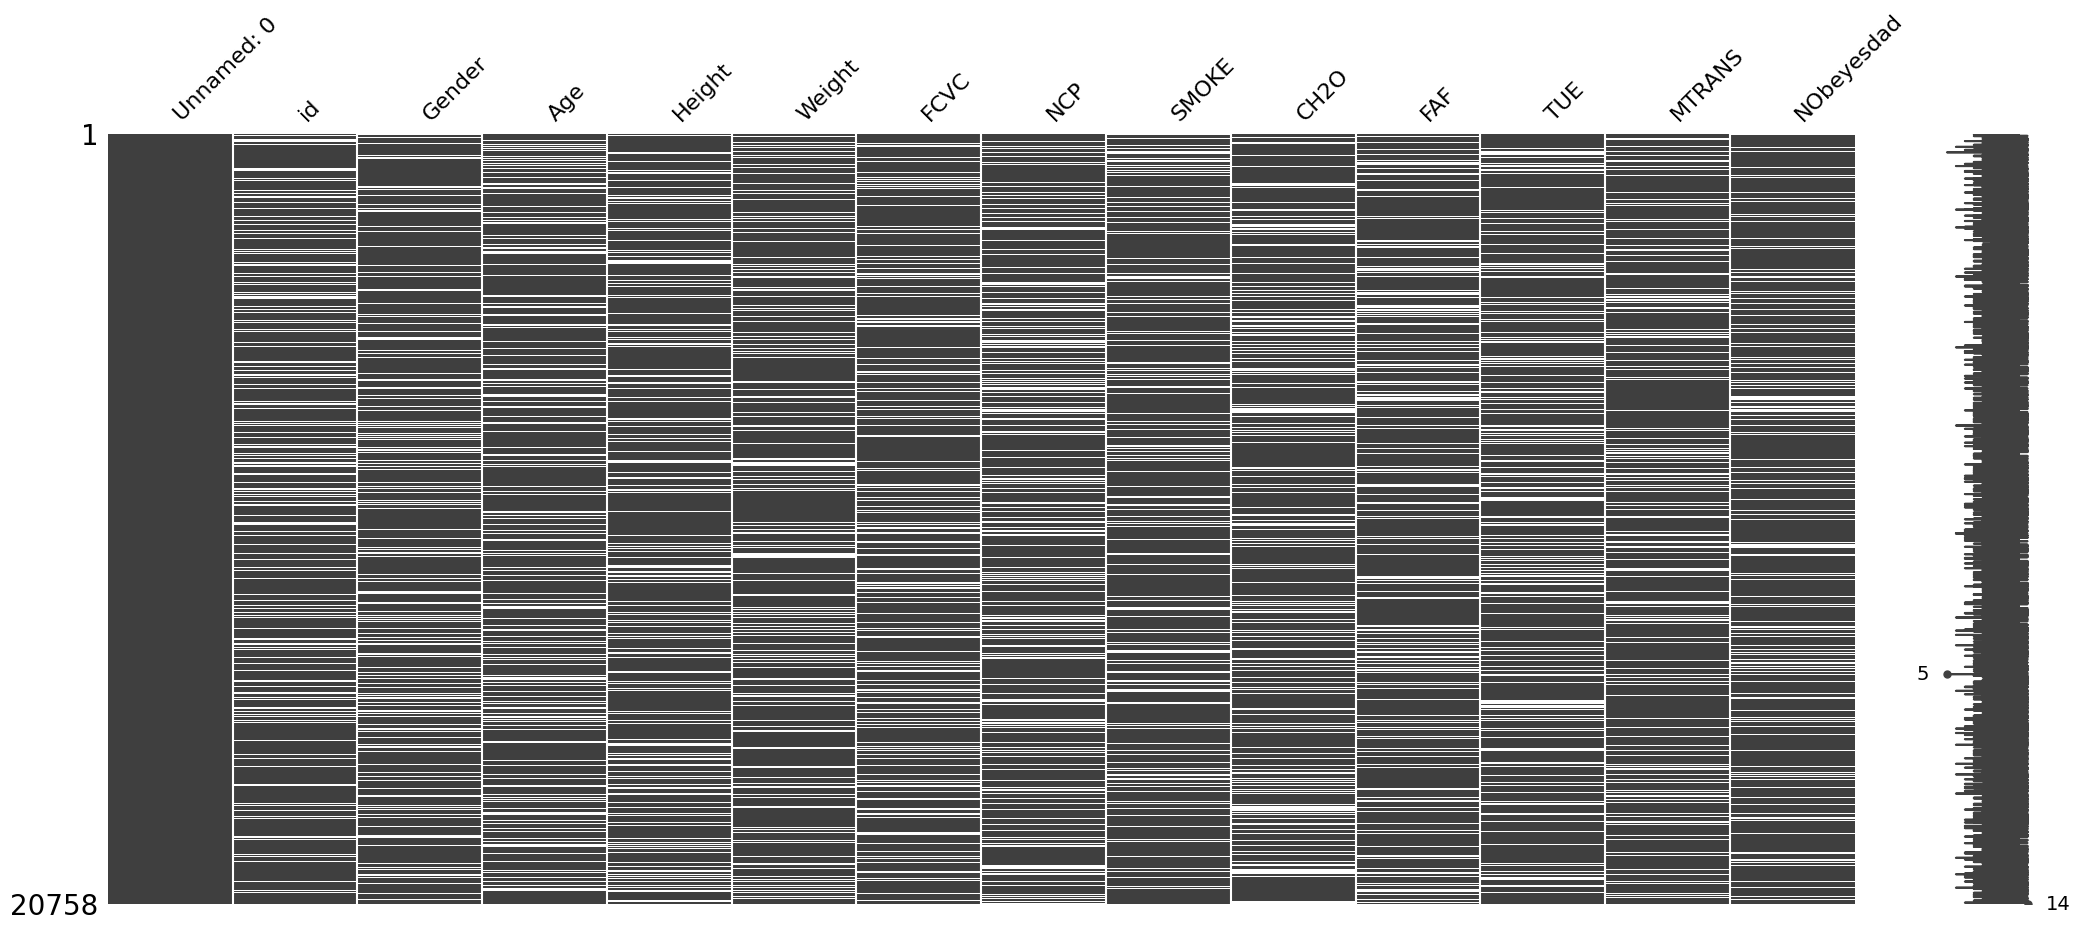

In [1348]:
msno.matrix(df)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [1349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20758 non-null  int64  
 1   id          16618 non-null  float64
 2   Gender      16634 non-null  object 
 3   Age         16608 non-null  float64
 4   Height      16667 non-null  float64
 5   Weight      16477 non-null  float64
 6   FCVC        16641 non-null  float64
 7   NCP         16697 non-null  float64
 8   SMOKE       16648 non-null  object 
 9   CH2O        16597 non-null  float64
 10  FAF         16619 non-null  float64
 11  TUE         16611 non-null  float64
 12  MTRANS      16600 non-null  object 
 13  NObeyesdad  16625 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 2.2+ MB


In [1350]:
df.isnull().sum()

Unnamed: 0       0
id            4140
Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [1351]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP',
       'SMOKE', 'CH2O', 'FAF', 'TUE', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [1352]:
df

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.000000,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,20753.0,NaN,NaN,NaN,114.187096,2.919584,3.000000,no,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,20754,20754.0,Male,18.000000,1.710000,50.000000,NaN,NaN,no,1.000000,NaN,NaN,NaN,Insufficient_Weight
20755,20755,NaN,Male,20.101026,1.819557,105.580491,2.407817,3.000000,no,2.000000,1.158040,1.198439,Public_Transportation,NaN
20756,20756,20756.0,NaN,33.852953,1.700000,83.520113,NaN,1.971472,NaN,2.144838,0.000000,NaN,NaN,NaN


In [1353]:
df.value_counts()

Unnamed: 0  id       Gender  Age        Height    Weight      FCVC      NCP       SMOKE  CH2O      FAF       TUE       MTRANS                 NObeyesdad         
20468       20468.0  Male    22.771001  1.699998  95.324282   2.000000  3.000000  no     2.000000  0.000000  1.000000  Public_Transportation  Obesity_Type_I         1
20454       20454.0  Male    24.449655  1.719342  81.650778   1.994679  1.474836  no     1.000000  0.000000  0.890527  Public_Transportation  Overweight_Level_II    1
20424       20424.0  Female  22.000000  1.650000  60.000000   3.000000  1.000000  no     1.000000  0.000000  0.000000  Public_Transportation  Normal_Weight          1
20403       20403.0  Female  22.000000  1.600000  82.000000   2.000000  1.000000  no     2.000000  0.000000  2.000000  Public_Transportation  Obesity_Type_I         1
20398       20398.0  Female  21.012542  1.724983  132.807100  3.000000  3.000000  no     2.837797  1.584716  0.887388  Public_Transportation  Obesity_Type_III       1
   

In [1354]:
df=df.drop(columns='Unnamed: 0')


In [1355]:
df=df.drop(columns='id')

In [1356]:
df

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,Female,18.000000,1.560000,57.000000,2.000000,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,NaN,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,NaN,NaN,NaN,114.187096,2.919584,3.000000,no,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,NaN,NaN,no,1.000000,NaN,NaN,NaN,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,2.407817,3.000000,no,2.000000,1.158040,1.198439,Public_Transportation,NaN
20756,NaN,33.852953,1.700000,83.520113,NaN,1.971472,NaN,2.144838,0.000000,NaN,NaN,NaN


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

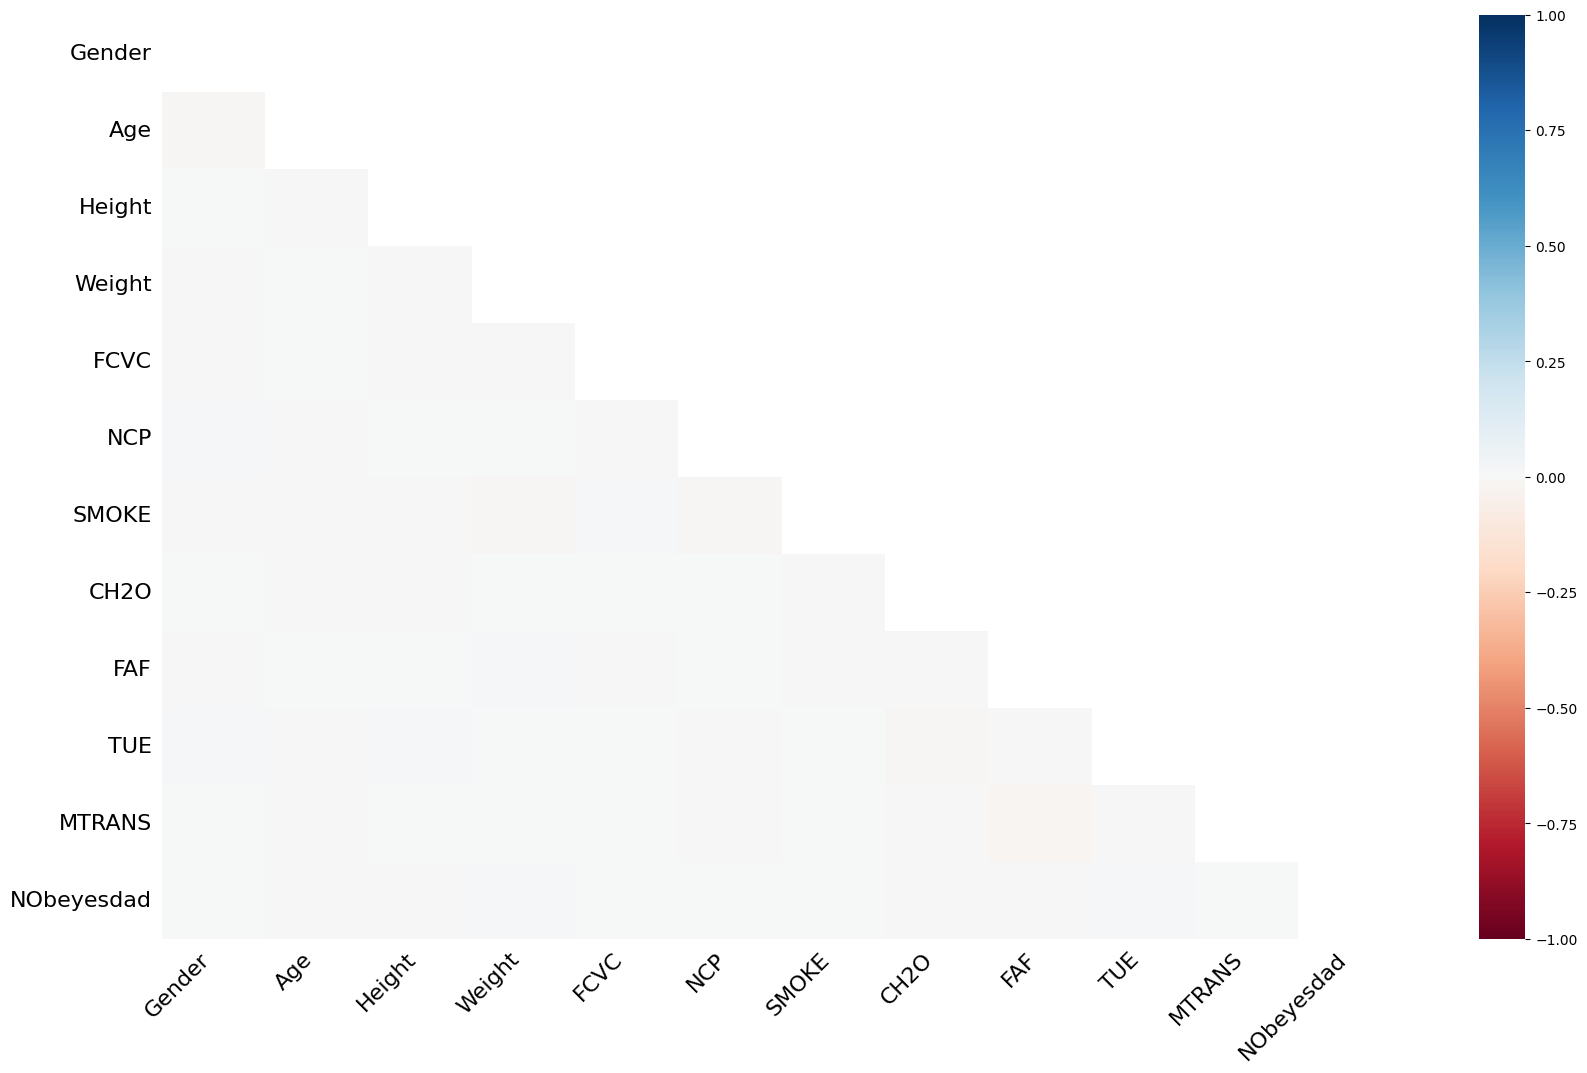

In [1357]:
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [1358]:
df.isnull().sum()

Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

In [1359]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [1360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16634 non-null  object 
 1   Age         16608 non-null  float64
 2   Height      16667 non-null  float64
 3   Weight      16477 non-null  float64
 4   FCVC        16641 non-null  float64
 5   NCP         16697 non-null  float64
 6   SMOKE       16648 non-null  object 
 7   CH2O        16597 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         16611 non-null  float64
 10  MTRANS      16600 non-null  object 
 11  NObeyesdad  16625 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.9+ MB


In [1361]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'SMOKE', 'CH2O',
       'FAF', 'TUE', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [1362]:
categorical_columns=['Gender', 'SMOKE','MTRANS','NObeyesdad']

In [1363]:
categorical_columns

['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']

In [1364]:
encoder=LabelEncoder()

In [1365]:
df.SMOKE.unique()

array(['no', nan, 'yes'], dtype=object)

In [1366]:
for col in categorical_columns:
    df[col]=encoder.fit_transform(df[col])

In [1367]:
df.isna().sum()

Gender           0
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE            0
CH2O          4161
FAF           4139
TUE           4147
MTRANS           0
NObeyesdad       0
dtype: int64

In [1368]:
df['Gender'] = df['Gender'].replace(2, np.nan)

In [1369]:
df.Gender.unique()

array([ 1.,  0., nan])

In [1370]:
imputer = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer.fit_transform(df[['Gender']])


In [1371]:
df.Gender.value_counts()

Gender
0.0    12458
1.0     8300
Name: count, dtype: int64

In [1372]:
print(df['Gender'].unique())  

[1. 0.]


In [1373]:
df.SMOKE.value_counts()

SMOKE
0    16449
2     4110
1      199
Name: count, dtype: int64

In [1374]:
df['SMOKE'] = df['SMOKE'].replace(1, np.nan)
imputer = SimpleImputer(strategy='most_frequent')
df['SMOKE'] = imputer.fit_transform(df[['SMOKE']])


In [1375]:
df.SMOKE.value_counts()

SMOKE
0.0    16648
2.0     4110
Name: count, dtype: int64

In [1376]:

df['MTRANS'] = df['MTRANS'].replace(2, np.nan)
imputer = SimpleImputer(strategy='most_frequent')
df['MTRANS'] = imputer.fit_transform(df[['MTRANS']])


In [1377]:
df.MTRANS.value_counts()

MTRANS
3.0    13388
5.0     4158
0.0     2817
4.0      368
1.0       27
Name: count, dtype: int64

In [1378]:

df['NObeyesdad'] = df['NObeyesdad'].replace(0, np.nan)
imputer = SimpleImputer(strategy='most_frequent')
df['NObeyesdad'] = imputer.fit_transform(df[['NObeyesdad']])

In [1379]:
df.NObeyesdad.value_counts()

NObeyesdad
7.0    6142
4.0    3238
3.0    2626
1.0    2442
2.0    2332
6.0    2038
5.0    1940
Name: count, dtype: int64

In [1380]:
df.isnull().sum()

Gender           0
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE            0
CH2O          4161
FAF           4139
TUE           4147
MTRANS           0
NObeyesdad       0
dtype: int64

In [1381]:
numeric_columns = df.select_dtypes(include=['float64']).columns

In [1382]:
mean_imputer = SimpleImputer(strategy='mean')

In [1383]:
df[numeric_columns] = mean_imputer.fit_transform(df[numeric_columns])

In [1384]:
print(df[numeric_columns].isnull().sum())

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [1385]:
X, Y = df.drop(columns=['FAF']), df['FAF']
X_Train, X_test, Y_Train, Y_test = train_test_split(X,Y,test_size=0.2)

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [1386]:
model = xgb.XGBRegressor()

In [1387]:
model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1388]:
Y_pred = model.predict(X_test)

In [1389]:
print(mean_squared_error(Y_pred, Y_test))

0.43915337596707954


In [1390]:
print(r2_score(Y_pred, Y_test))

-1.1744152588510333


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [1391]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [1392]:
# Write your code here. Add as many boxes as you need.